# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [59]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Alleen\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [60]:
# Reading the News API key enviroment variable
api_key = os.getenv("news_api")



In [61]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)



In [62]:
# Fetch the Bitcoin news articles
bitcoin_headlines = newsapi.get_everything(
    q= "bitcoin",
    language= "en",
    page_size= 100,
    sort_by= "relevancy"
)
print(f"Total bitcoin headlines: {bitcoin_headlines['totalResults']}")

Total bitcoin headlines: 8442


In [63]:
# Fetch the Ethereum news articles
ethereum_headlines = newsapi.get_everything(
    q= "ethereum",
    language= "en",
    page_size= 100,
    sort_by= "relevancy"
)
print(f"Total ethereum headlines: {ethereum_headlines['totalResults']}")

Total ethereum headlines: 1970


In [64]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiment = []

for article in bitcoin_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]

        bitcoin_sentiment.append({
            "Date": date,
            "Text": text,
            "Compound": compound,
            "Negative": neg,
            "Neutral": neu,
            "Positive": pos,
        })

    except AttributeError:
        pass

# Dataframe
bitcoin_df = pd.DataFrame(bitcoin_sentiment)
bitcoin_df_columns = ["Date", "Text", "Compound", "Positive", "Neutral", "Negative"]
bitcoin_df = bitcoin_df[bitcoin_df_columns]

bitcoin_df.head()

,Date,Text,Compound,Positive,Neutral,Negative
0,2021-02-26,Some things are best left a mystery at least a...,0.6369,0.113,0.887,0.0
1,2021-03-03,,0.0000,0.000,0.000,0.0
2,2021-02-16,"Bitcoin is the future, again: this morning, it...",0.7041,0.140,0.860,0.0
3,2021-02-13,"In case you havent noticed, Bitcoins having a ...",0.4215,0.101,0.899,0.0
4,2021-02-25,TL;DR: Enter the The Complete Bitcoin (BTC) In...,0.8316,0.246,0.754,0.0


In [65]:
# Create the ethereum sentiment scores DataFrame
ethereum_sentiment = []

for article in ethereum_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]

        ethereum_sentiment.append({
            "Date": date,
            "Text": text,
            "Compound": compound,
            "Negative": neg,
            "Neutral": neu,
            "Positive": pos,
        })

    except AttributeError:
        pass

# Dataframe
ethereum_df = pd.DataFrame(ethereum_sentiment)
ethereum_df_columns = ["Date", "Text", "Compound", "Positive", "Neutral", "Negative"]
ethereum_df = ethereum_df[ethereum_df_columns]

ethereum_df.head()

,Date,Text,Compound,Positive,Neutral,Negative
0,2021-02-18,Worried that the GeForce RTX 3060 will be sold...,-0.3400,0.063,0.818,0.119
1,2021-03-06,NFTs are the latest cryptocurrency rage these ...,-0.4588,0.066,0.789,0.145
2,2021-02-27,NFTs (non-fungible tokens) — or scarce digital...,0.4404,0.091,0.909,0.000
3,2021-02-20,While the first Christie's auction of digital ...,0.0258,0.030,0.970,0.000
4,2021-02-18,Attempting to get ahead of cryptocurrency mine...,0.7096,0.144,0.856,0.000


In [66]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,Compound,Positive,Neutral,Negative
count,95.000000,95.000000,95.000000,95.000000
mean,0.164316,0.058579,0.911768,0.019126
std,0.336299,0.064128,0.123541,0.049144
min,-0.906200,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.860000,0.000000
50%,0.043300,0.049000,0.930000,0.000000
75%,0.440400,0.091000,1.000000,0.000000
max,0.851900,0.260000,1.000000,0.326000


In [67]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,Compound,Positive,Neutral,Negative
count,91.000000,91.000000,91.000000,91.000000
mean,0.174930,0.067308,0.903407,0.029275
std,0.393103,0.065594,0.081561,0.057105
min,-0.910000,0.000000,0.664000,0.000000
25%,0.000000,0.000000,0.854000,0.000000
50%,0.140600,0.063000,0.909000,0.000000
75%,0.492750,0.099000,0.985000,0.054000
max,0.877900,0.251000,1.000000,0.299000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum has the highest mean positive score of 0.067

Q: Which coin had the highest compound score?

A: Bitcoin has the highest compound score of 95

Q. Which coin had the highest positive score?

A: Bitcoin has the highest positive score of 0.26

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [68]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [69]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
# YOUR CODE HERE!

In [70]:
# Complete the tokenizer function

def tokenizer(text):
    """Tokenizes text."""
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    tokens = [word.lower() for word in lem if word.lower() not in sw]
    return tokens

In [76]:
Bitcoin_tokens = [tokenizer(headline) for headline in bitcoin_df["Text"]]
bitcoin_df["Tokens"] = Bitcoin_tokens

bitcoin_df.head(10)

,Date,Text,Compound,Positive,Neutral,Negative,Tokens
0,2021-02-26,Some things are best left a mystery at least a...,0.6369,0.113,0.887,0.0,"[thing, best, left, mystery, least, far, coinb..."
1,2021-03-03,,0.0000,0.000,0.000,0.0,[]
2,2021-02-16,"Bitcoin is the future, again: this morning, it...",0.7041,0.140,0.860,0.0,"[bitcoin, future, morning, hit, alltime, high,..."
3,2021-02-13,"In case you havent noticed, Bitcoins having a ...",0.4215,0.101,0.899,0.0,"[case, havent, noticed, bitcoins, bit, moment,..."
4,2021-02-25,TL;DR: Enter the The Complete Bitcoin (BTC) In...,0.8316,0.246,0.754,0.0,"[tldr, enter, complete, bitcoin, btc, investme..."
5,2021-02-23,New York (CNN Business)Bitcoin's roller coaste...,0.1027,0.042,0.958,0.0,"[new, york, cnn, businessbitcoins, roller, coa..."
6,2021-02-17,Blockchain.com has announced that it has raise...,0.5994,0.145,0.855,0.0,"[blockchaincom, ha, announced, ha, raised, mil..."
7,2021-02-25,"This morning Coinbase, an American cryptocurre...",0.4404,0.088,0.912,0.0,"[morning, coinbase, american, cryptocurrency, ..."
8,2021-02-19,"February\r\n19, 2021\r\n3 min read\r\nThis sto...",0.0000,0.000,1.000,0.0,"[february, min, readthis, story, originally, a..."
9,2021-03-05,By Reuters Staff\r\nFILE PHOTO: A collection o...,0.0000,0.000,1.000,0.0,"[reuters, stafffile, photo, collection, bitcoi..."


In [77]:
# Create a new tokens column for ethereum
ethereum_tokens = [tokenizer(headline) for headline in ethereum_df["Text"]]
ethereum_df["Tokens"] = ethereum_tokens

ethereum_df.head(10)

,Date,Text,Compound,Positive,Neutral,Negative,Tokens
0,2021-02-18,Worried that the GeForce RTX 3060 will be sold...,-0.3400,0.063,0.818,0.119,"[worried, geforce, rtx, sold, cryptocurrency, ..."
1,2021-03-06,NFTs are the latest cryptocurrency rage these ...,-0.4588,0.066,0.789,0.145,"[nfts, latest, cryptocurrency, rage, day, band..."
2,2021-02-27,NFTs (non-fungible tokens) — or scarce digital...,0.4404,0.091,0.909,0.000,"[nfts, nonfungible, token, scarce, digital, co..."
3,2021-02-20,While the first Christie's auction of digital ...,0.0258,0.030,0.970,0.000,"[first, christies, auction, digital, artwork, ..."
4,2021-02-18,Attempting to get ahead of cryptocurrency mine...,0.7096,0.144,0.856,0.000,"[attempting, get, ahead, cryptocurrency, miner..."
5,2021-02-18,"NEW YORK (Reuters) - Ethereum, the second larg...",0.5719,0.139,0.861,0.000,"[new, york, reuters, ethereum, second, largest..."
6,2021-02-18,"NEW YORK, Feb 18 (Reuters) - Ethereum, the sec...",0.5719,0.135,0.865,0.000,"[new, york, feb, reuters, ethereum, second, la..."
7,2021-02-22,Ethereum rose by 7.34% in the week ending 21st...,0.0000,0.000,1.000,0.000,"[ethereumrose, week, ending, st, february, fol..."
8,2021-02-26,Some things are best left a mystery at least a...,0.6369,0.113,0.887,0.000,"[thing, best, left, mystery, least, far, coinb..."
9,2021-03-04,Cryptocurrency exchange company Bitfinex is la...,0.2960,0.090,0.862,0.048,"[cryptocurrency, exchange, company, bitfinex, ..."


### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [78]:
from collections import Counter
from nltk import ngrams

In [105]:
# Generate the Bitcoin N-grams where N=2
N=2
btc_ngrams = Counter(ngrams(bitcoin_df["Text"].str.cat().split(), N))
btc_ngrams.most_common(20)

[(('Reuters', 'Staff'), 40),
 (('chars]By', 'Reuters'), 39),
 (('(Reuters)', '-'), 39),
 (('FILE', 'PHOTO:'), 26),
 (('Staff', 'FILE'), 21),
 (('in', 'this'), 19),
 (('illustration', 'taken'), 19),
 (('-', 'Bitcoin'), 19),
 (('PHOTO:', 'A'), 15),
 (('of', 'the'), 15),
 (('virtual', 'currency'), 14),
 (('a', 'new'), 13),
 (('$50,000', 'on'), 13),
 (('Bitcoin', 'is'), 13),
 (('currency', 'Bitcoin'), 12),
 (('this', 'picture'), 11),
 (('picture', 'illustration'), 11),
 (('hit', 'a'), 11),
 (('of', 'virtual'), 10),
 (('record', 'high'), 10)]

In [107]:
# Generate the Ethereum N-grams where N=2
N=2
eth_ngrams = Counter(ngrams(ethereum_df["Text"].str.cat().split(), N))
eth_ngrams.most_common(20)

[(('(Reuters)', '-'), 19),
 (('chars]By', 'Reuters'), 11),
 (('Reuters', 'Staff'), 11),
 (('of', 'the'), 10),
 (('a', 'new'), 9),
 (('for', 'the'), 8),
 (('FILE', 'PHOTO:'), 7),
 (('the', 'first'), 6),
 (('record', 'high'), 6),
 (('in', 'the'), 6),
 (('-', 'Bitcoin'), 6),
 (('Staff', 'FILE'), 6),
 (('It', 'indicates'), 6),
 (('way', 'to'), 5),
 (('hit', 'a'), 5),
 (('has', 'been'), 5),
 (('in', 'a'), 5),
 (('PHOTO:', 'A'), 5),
 (('on', 'the'), 5),
 (('of', 'bitcoin'), 5)]

In [108]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [110]:
# Use token_count to get the top 10 words for Bitcoin
btc_token = tokenizer(bitcoin_df["Text"].str.cat())

token_count(btc_token,10)

[('bitcoin', 74),
 ('reuters', 71),
 ('charsby', 39),
 ('photo', 31),
 ('ha', 24),
 ('currency', 23),
 ('high', 22),
 ('record', 21),
 ('stafffile', 21),
 ('virtual', 20)]

In [111]:
# Use token_count to get the top 10 words for Ethereum
eth_token = tokenizer(ethereum_df["Text"].str.cat())

token_count(eth_token,10)

[('bitcoin', 36),
 ('reuters', 27),
 ('cryptocurrency', 23),
 ('ha', 21),
 ('new', 19),
 ('high', 15),
 ('market', 12),
 ('card', 11),
 ('digital', 11),
 ('ethereum', 11)]

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [112]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

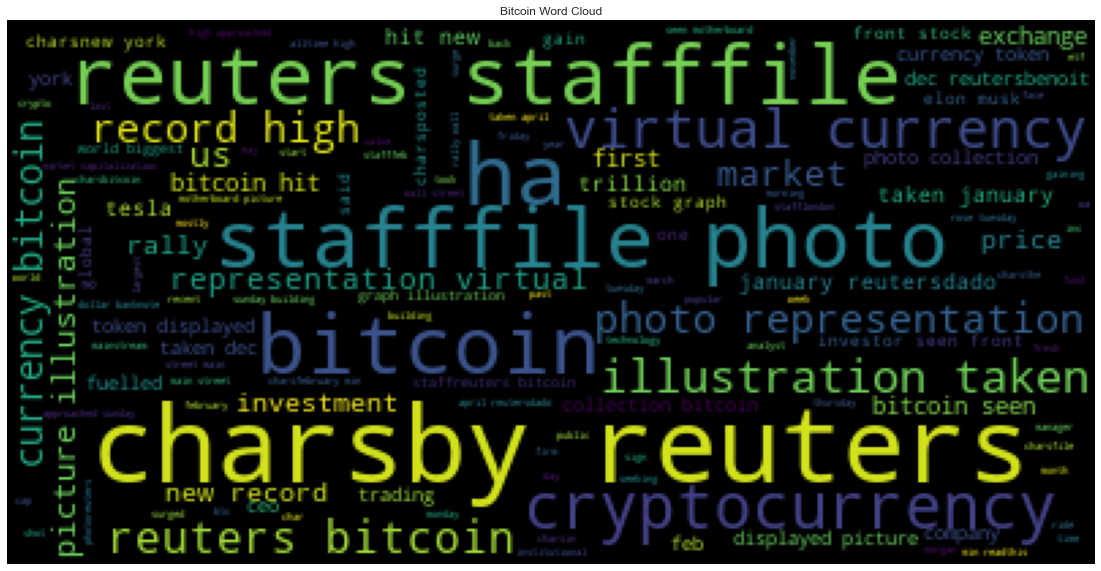

In [119]:
# Generate the Bitcoin word cloud
btc_wc = WordCloud().generate(' '.join(btc_token))
plt.title("Bitcoin Word Cloud")
plt.axis('off')

plt.imshow(btc_wc)

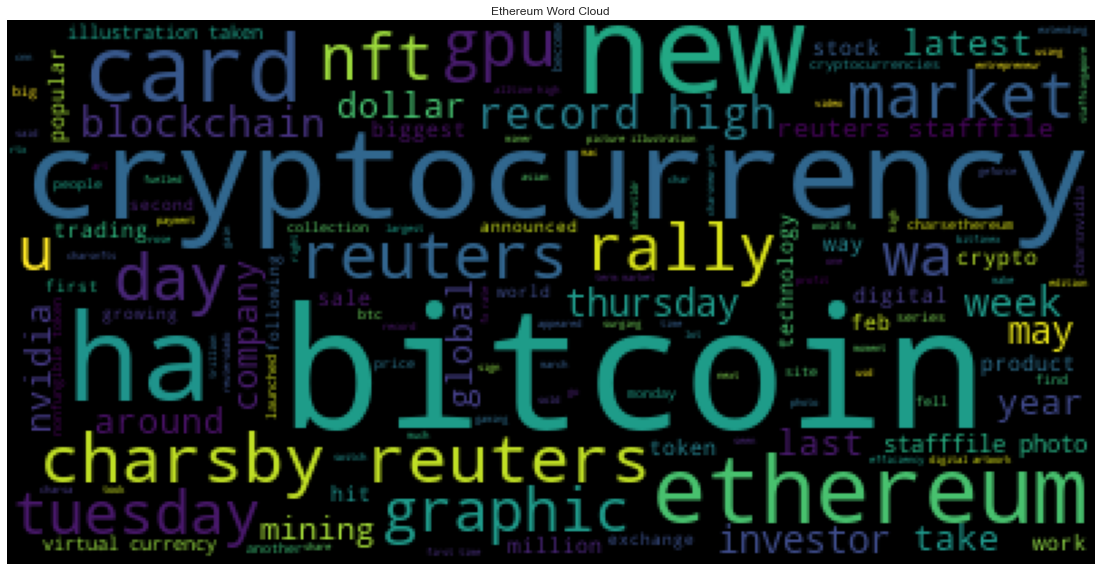

In [120]:
# Generate the Ethereum word cloud
eth_wc = WordCloud().generate(' '.join(eth_token))
plt.title("Ethereum Word Cloud")
plt.axis('off')

plt.imshow(eth_wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [121]:
import spacy
from spacy import displacy

In [122]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [123]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [134]:
# Concatenate all of the Bitcoin text together
concat_btc = bitcoin_df.Text.str.cat()


In [135]:
btc_doc = nlp(concat_btc)
btc_doc.user_data["Title"] = "BTC NER"
displacy.render(btc_doc, style = 'ent')

### Ethereum NER

In [137]:
 # Concatenate all of the Ethereum text together
concat_eth = ethereum_df.Text.str.cat()
eth_doc = nlp(concat_eth)
eth_doc.user_data["Title"] = "ETH NER"
displacy.render(eth_doc, style = 'ent')